### Задачи: Hooandja Parser
#Пройти тест
#Спарить информацию по подаркам
#Совместить 2 базы
#Перейти к матплотлиб
#отчистка данных
#спарсить информацию по всем вкладчикам

In [6]:
### График собранных средств за все года

         Unnamed: 0        Plan       Budget
Date                                        
..2012  1181.000000  112.043478  1676.826087
..2013  1119.000000  114.900990  3032.990099
..2014  1004.000000  116.906977  2891.806202
..2015   865.000000  112.127517  2934.724832
..2016   695.195767  117.460317  2831.682540
..2017   507.927778  117.122222  3114.388889
..2018   321.141104  115.263804  3335.920245
..2019   151.000000  116.085366  3506.993902
..2020    33.123077  121.292308  3786.630769


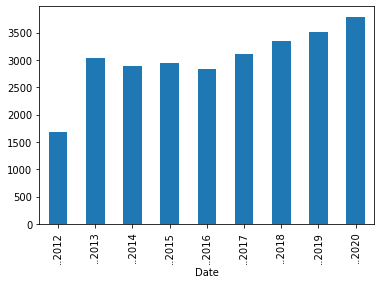

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("projektid1e.csv", na_values="NA")
#print (data.head())

data["Date"] = data["Date"].astype("category")
data_group = data.groupby("Date").mean()
print (data_group)

data_group["Budget"].plot.bar()
plt.show()

### Определение среднего бюджета во всех категориях на 30 лет вперёд

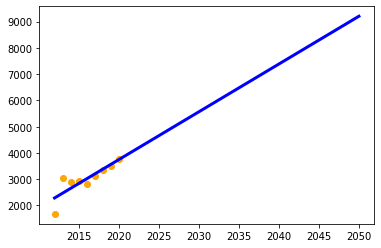

[[9205.60969028]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("projektid1e.csv", na_values="NA")
data_avg = data.groupby("Date").mean()
x = np.array(data_avg.index).reshape(len(data_avg.index), 1)
y = np.array(data_avg["Budget"]).reshape(len(data_avg.index), 1)
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color="orange")
x = np.append(x, [2050]).reshape(len(data_avg.index)+1, 1)
plt.plot(x, model.predict(x), color="blue", linewidth=3)
plt.show()
print (model.predict(np.array(2050).reshape(1, 1)))

In [7]:
# Какое среднее значение по данным от вкладчиков
import pandas as pd
data = pd.read_csv("bakers.csv", na_values="NA")
#print (data.head())
print ("Средняя сумма подарка", data["amount"].mean().round())
print ("Среднее количество вкладчиков на подарок", data["bakers"].mean().round())

Средняя сумма подарка 147.0
Среднее количество вкладчиков на подарок 13.0


In [10]:
# Какое среднее значение по данным от удачных проектов
import pandas as pd
data = pd.read_csv("projektid1b.csv", na_values="NA")
#print (data.head())
print ("Средний процент полученного бюджета", data["Plan"].mean().round())
print ("Среднее количество полученных средств", data["Budget"].mean().round())

Средний процент полученного бюджета 115.0
Среднее количество полученных средств 3100.0


In [3]:
data.fillna(0, axis=1, inplace=True)
data_array = data.values
print ("Возможный бжджет:", data["Budget"].mean().round(),"€", 'От цели ... €')

Возможный бжджет: 3100.0 € От цели ... €


#создаём набор индексов, и хотим получить все номера строк 
#которые содержат в столбце А название Б

In [57]:
import pandas as pd
data = pd.read_csv("projektid1c.csv", na_values="NA", 
                   names = ["9", "8", "7", "6", "5", "4", "3", "2", "1"], 
                   skiprows=1, converters={"1": pd.to_datetime})
#print (data.head())
area_indexes = data[data["8"].str.contains("kool")].index
#print (area_indexes)
data_areas_index = [(lambda n: "KOOL" if n in area_indexes else "MEDIUM")(i) 
                    for i in range(0, len(data.index))]
#print (data_areas_index)
data["Type"] = data_areas_index
data = data.set_index(["Type", "8"])
data = data.sort_index()
#print (data)
areas = data.loc["KOOL"]
#print (areas)



### Фильтрация данных:
#Собрать общую сумму вкладов за каждый год
#Средний процент удачных проектов

### Линейная регрессия: предсказание изменения показателей по всем категориям за год
#Средняя Сумма Удачного проекта 
#Средний Процент Удачных проектов

In [ ]:
# Линейная Регрессия
data_avg = data.groupby("Cat").mean()
x = np.array(data_avg.index).reshape(len(data_avg.index), 1)
y = np.array(data_avg["Budget"]).reshape(len(data_avg.index), 1)
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color="orange")
x = np.append(x, [2021]).reshape(len(data_avg.index)+1, 1)
plt.plot(x, model.predict(x), color="blue", linewidth=3)
plt.show()
print (model.predict(np.array(2021).reshape(1, 1)))

In [3]:
#Фильтрация данных: Получение подарков разделённых на ценовые категории 1 5 10 15 ...
import pandas as pd
data = pd.read_csv("bakers.csv", na_values="NA", 
                   names = ["Link", "Gift", "Bakers"], skiprows=1, 
                  converters={})
data.fillna(0, axis=1, inplace=True)
#print (data["Gift"]<=1)
#print (data > 10)
data_less10 = data[(data["Gift"] < 2)]
#data_less10_more1 = data[(data["Gift"] < 10) & (data["Gift"] > 1)]
#print (data_less10_more1)
print (data_less10)

                                                   Link  Gift  Bakers
38    https://www.hooandja.ee/projekt/kinkeraamat-on...     1      10
79          https://www.hooandja.ee/projekt/film-ankeet     1      19
141      https://www.hooandja.ee/projekt/palavikulilled     1      11
245   https://www.hooandja.ee/projekt/volumetsa-raja...     1      11
275         https://www.hooandja.ee/projekt/raamatusiil     1      33
...                                                 ...   ...     ...
6026  https://www.hooandja.ee/projekt/pollianna-dava...     1       0
6492  https://www.hooandja.ee/projekt/35-aastat-saar...     1       5
6784       https://www.hooandja.ee/projekt/film-doomino     1       6
7663  https://www.hooandja.ee/projekt/kogukonnamuusi...     1      40
7989  https://www.hooandja.ee/projekt/kotid-karmi-aj...     1       8

[76 rows x 3 columns]


### Очистка и фильтрация групп

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_2 = pd.read_csv('http://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv', delimiter=';')

#ОБЪЕДИНЕНИЕ ФРЕЙМОВ

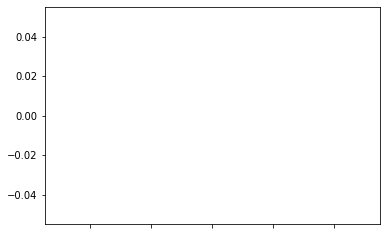

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
data_2017 = pd.read_csv("projektid2017.csv", na_values="NA", names = ["Доход", "2017"], skiprows=1, index_col="Доход")
data_2018 = pd.read_csv("projektid2018.csv", na_values="NA", names = ["Доход", "2018"], skiprows=1, index_col="Доход")
data = pd.merge(data_2017, data_2018, left_index=True, right_index=True)
data.fillna(0, axis=1, inplace=True)
data.mean().plot.line()
plt.show()

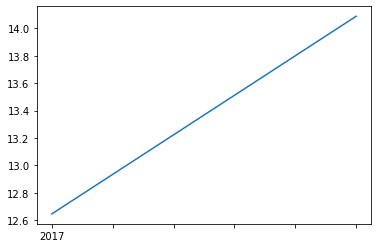

In [30]:
# объединение данных с двух таблиц
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data_2017 = pd.read_csv("http://video.ittensive.com/python-advanced/internet-2017.csv", na_values="NA", skiprows=1, decimal=",", names=["Регион", "2017"], index_col="Регион")
data_2018 = pd.read_csv("http://video.ittensive.com/python-advanced/internet-2018.csv", na_values="NA", skiprows=1, decimal=",", names=["Регион", "2018"], index_col="Регион")
data = pd.merge(data_2017, data_2018, left_index=True, right_index=True)
data.fillna(0, axis=1, inplace=True)
data.mean().plot.line()
plt.show()

In [36]:
import pandas as pd

data_1 = pd.read_csv('http://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';')
data_1 = data_1.set_index(['Year', 'Period'])

data_2 = pd.read_csv('http://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv', delimiter=';')
data_2 = data_2.set_index(['AdmArea', 'Year', 'Month'])
data_2 = data_2.loc['Центральный административный округ']
data_2.index.names = ['Year', 'Period']

data = pd.merge(data_1, data_2, left_index=True, right_index=True)

data = data.reset_index()
data = data.set_index('Calls')
# print(data_1.head())
# print(data_2.head())
print(data['UnemployedMen'][0:1])


Calls
402    15730
Name: UnemployedMen, dtype: int64


In [58]:
# преобразовывание данных в числа
data = pd.read_csv("projektid1b.csv", na_values="NA")
dt = data['Date'].values[0]
day, month, year = dt.split('.')
dt = date(int(year), int(month), int(day))

print (dt)


2020-06-17


In [53]:
# преобразовывание данных в числа 2

data = pd.read_csv("projektid1b.csv", na_values="NA")
dt = data['Date'].values[0]
day, month, year = dt.split('.')
dt = date(int(year), int(month), int(day))

print(dt)

2020-06-17


In [ ]:
dt = data['Date'].values[0]
day, month, year = dt.split('.')
dt = date(int(year), int(month), int(day))
print(dt, type(dt))

In [42]:
# преобразовывание данных в числа 2

from datetime import date

dt = data['Date'].values[0]
day, month, year = dt.split('.')
dt = date(int(year), int(month), int(day))
print(dt, type(dt))

2020-06-17 <class 'datetime.date'>


In [31]:
print (data["Date"])

0       17.06.2020
1       12.06.2020
2       11.06.2020
3       08.06.2020
4       05.06.2020
           ...    
1187    08.08.2012
1188    31.07.2012
1189    22.07.2012
1190    16.07.2012
1191    06.07.2012
Name: Date, Length: 1192, dtype: object


datetime.date(2020, 6, 17)

In [11]:
print (data["Budget"])

0       4790
1       2970
2       1064
3       1535
4       7338
        ... 
1187    2236
1188    1382
1189    2303
1190     636
1191    1252
Name: Budget, Length: 1192, dtype: int64
